In [8]:
# To avoid tensorflow warnings
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

# To avoid other python wsrnings
import warnings
warnings.filterwarnings('ignore')

In [54]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50V2

import keras
from tensorflow import keras
import tensorflow as tf

import io
from PIL import Image
import ipywidgets
from IPython.display import display,clear_output

print(colored('All libraries imported succesfully', 'green', attrs=['bold']))

All libraries imported succesfully


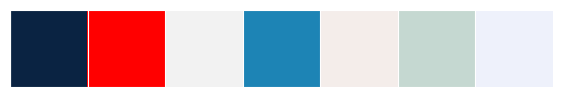

In [2]:
colors_dark = ["#0A2342", '#ff0000', '#f2f2f2', "#1d84b5" , '#f4edea', '#c5d8d1', '#eef1fb']

sns.palplot(colors_dark)

In [3]:
# Set seaborn plot style to darkgrid
sns.set_style('darkgrid')

In [8]:
# Location of main Dataset
base_dir = './Data/'

In [9]:
# Loop over folders to extract class_names
classes = [class_name for class_name in os.listdir(base_dir)]
classes

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']

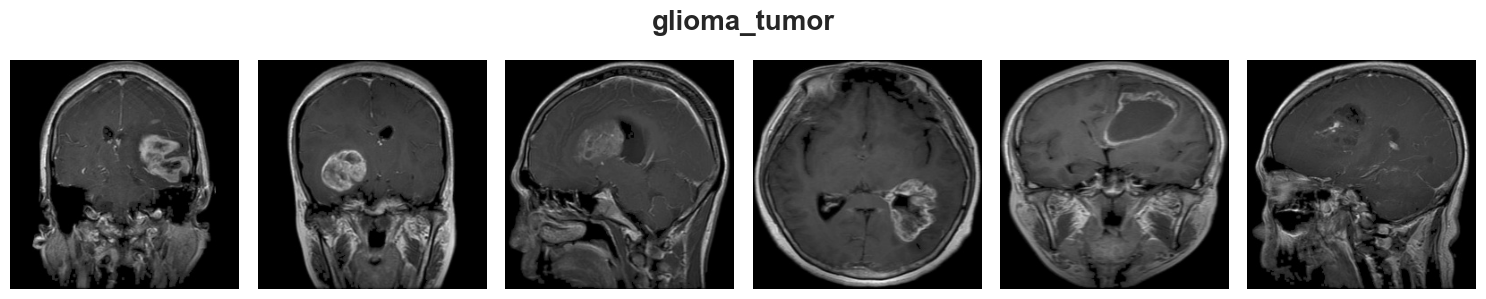

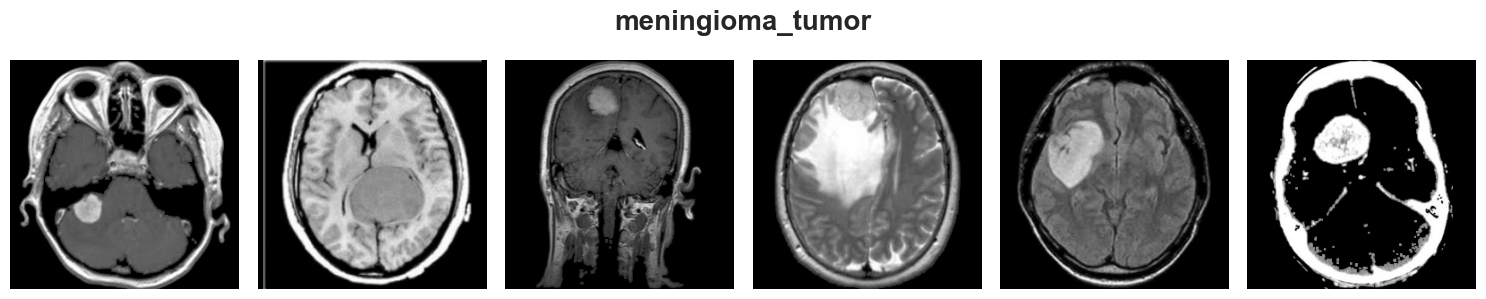

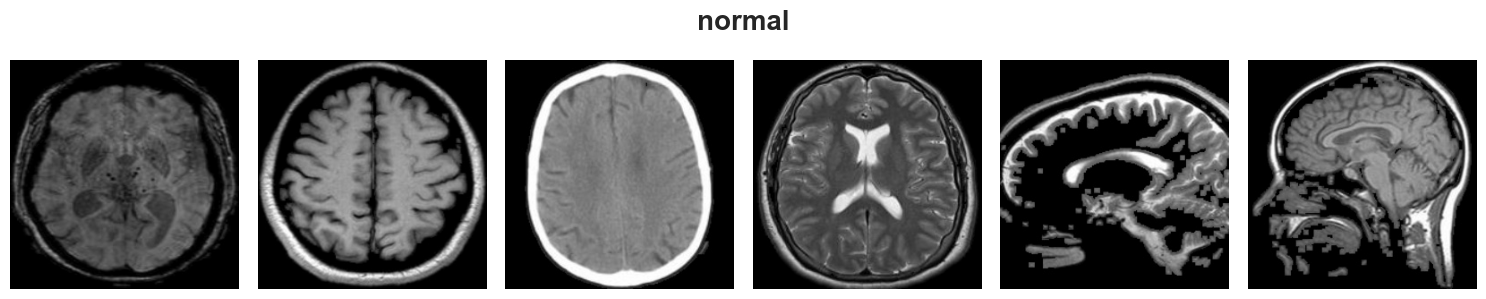

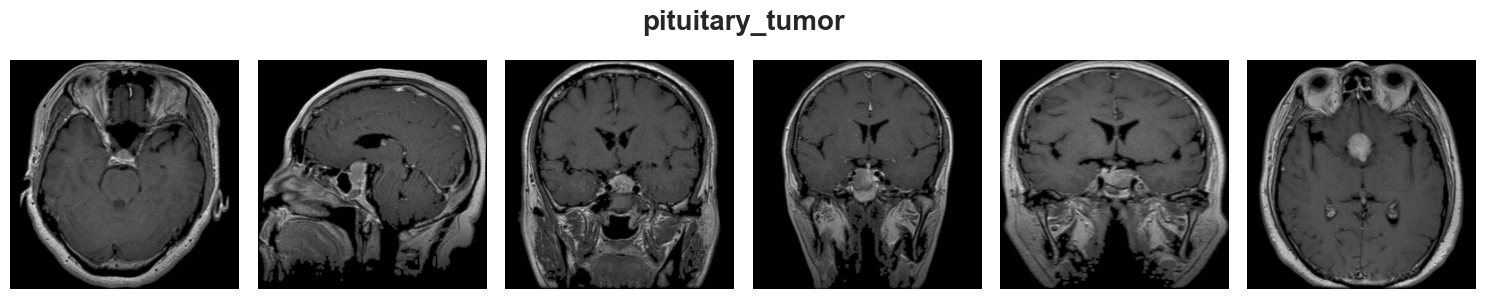

In [13]:
# A loop to iterate below codes for each class
for class_name in classes:
    # Create a plot with 1 row and 6 columns
    fig, ax = plt.subplots(1, 6, figsize=(15, 3))
    # Define a variable for each class_name's path by joining base_directory and each class_name
    class_path = os.path.join(base_dir, class_name)
    # Files is a list of all image names in each folder (class)
    files = os.listdir(class_path)
    # Choose 6 random images from each class to show in plot
    random_images = random.choices(files, k=6)
    # A loop to iterate in each 6 random images
    for i in range(6):
        # Print class_name as subtitle for each class
        plt.suptitle(class_name, fontsize=20, fontweight='bold')
        # Variable img is path of image, by joining class_path and image file name
        img = os.path.join(class_path, random_images[i])
        # Load image in img variable using keras.utils.load_img(image_path)
        img = load_img(img)
        # Plot image
        ax[i].imshow(img)
        # Turn axis off
        ax[i].axis('off')
    # Make plots to become nearer to each other
    plt.tight_layout()
plt.show()

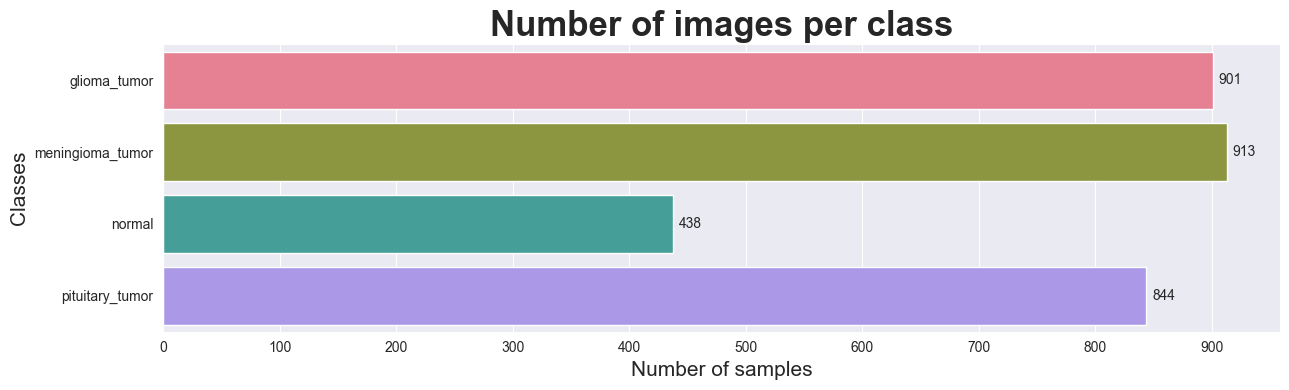

In [17]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Count is a list to store number of images for each class.
counts = [] 
# Loop over classes to iterate below code for each class
for class_name in classes:
    # Define class path by joining base_directory and class_name
    class_path = os.path.join(base_dir, class_name)
    # Add number of files in each class to count list
    counts.append(len(os.listdir(class_path)))

# Define plot size
plt.figure(figsize=(13, 4))

# Define a color palette
colors = sns.color_palette("husl", len(classes))

# Using seaborn to plot a barplot for each class with different colors
ax = sns.barplot(y=classes, x=counts, palette=colors, hue=classes)

# Set X-axis range and ticks
ax.set_xticks(range(0, 950, 100))

# Annotate each bar with the count
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height() / 2.,
            '{}'.format(counts[i]),
            va="center", fontsize=10)

# Set plot title
plt.title('Number of images per class', fontsize=25, fontweight='bold')
# Set Y-axis label
plt.ylabel('Classes', fontsize=15)
# Set X-axis label
plt.xlabel('Number of samples', fontsize=15)

plt.tight_layout()
# Show plot
plt.show()

In [18]:
# Make sumation of all values in count list as all image counts.
sum_count_before = sum(counts)
print(colored(f'Number of all images is : {sum_count_before}', 'blue', attrs=['bold']))

Number of all images is : 3096


In [22]:
# Convert our data to tensorflow dataset by keras.utils.image_dataset_from_directory
train_full = image_dataset_from_directory(
    directory=base_dir,        # Path of base directory
    labels='inferred',         # to generate labels from the directory structure
    label_mode='categorical',  # Type of labels
    class_names=classes,       # List of class names
    shuffle=True,              # To shuffle the dataset
    seed=42,                   # Optional random seed for shuffling and transformations
    batch_size=32,             # Define batch size
    image_size=(224, 224)      # Size to resize images to after they are read from disk
)

Found 3096 files belonging to 4 classes.


In [23]:
# Shuffle dataset again after creation
train_full = train_full.shuffle(1024).prefetch(tf.data.AUTOTUNE)

In [25]:
# Print Number of all batches in dataset
num_of_full_train_batches = len(list(train_full))
print(colored(f'Number of batches in train_full : {num_of_full_train_batches}', 'red', attrs=['bold']))

Number of batches in train_full : 97


In [26]:
# Define variable to store number of batches for train dataset
num_train_batches = int(num_of_full_train_batches * 0.80)
# Define variable to store number of batches for validation and test dataset
num_valid_test_batches = num_of_full_train_batches - num_train_batches


# Print the TARGET : number of batches for train, validation and test dataset to each
print(colored(' Target : ', 'green', attrs=['bold']))
print('-'*35)
print(colored(f'Number of  Train  batches : {num_train_batches}', 'blue', attrs=['bold']))
print(colored(f'Number of Validation batches : {num_valid_test_batches//2}', 'blue', attrs=['bold']))
print(colored(f'Number of Test batches : {num_valid_test_batches//2}', 'blue', attrs=['bold']))

 Target : 
-----------------------------------
Number of  Train  batches : 77
Number of Validation batches : 10
Number of Test batches : 10


In [27]:
# Shuffle dataset
train_full = train_full.shuffle(buffer_size=3)

# Apply above settings to main dataset to split to train, validation and test dataset
train_ds = train_full.take(num_train_batches)
remain_ds = train_full.skip(num_train_batches)
valid_ds = remain_ds.take(num_valid_test_batches//2) 
test_ds = remain_ds.skip(num_valid_test_batches//2)

In [28]:
# Print number of batches in train, validation and test dataset after split them
print(colored(f'Number of train batches : {len(list(train_ds))}', 'green', attrs=['bold']))
print(colored(f'Number of valid batches : {len(list(valid_ds))}', 'green', attrs=['bold']))
print(colored(f'Number of test  batches : {len(list(test_ds))}', 'green', attrs=['bold']))

Number of train batches : 77
Number of valid batches : 10
Number of test  batches : 10


In [31]:
# Use ResNet50V2 from keras.application as pre trained model with imagenet weight
pre_trained_model = keras.applications.ResNet50V2(
    weights='imagenet', classes=4, input_shape=(224, 224, 3), include_top=False
)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [32]:
# Show information of ResNet50V2 layers
pre_trained_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [33]:
# Print all the layer's name in ResNet50V2
for layer in pre_trained_model.layers :
    print(layer.name)

input_layer
conv1_pad
conv1_conv
pool1_pad
pool1_pool
conv2_block1_preact_bn
conv2_block1_preact_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_pad
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_out
conv2_block2_preact_bn
conv2_block2_preact_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_pad
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_out
conv2_block3_preact_bn
conv2_block3_preact_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_pad
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
max_pooling2d
conv2_block3_3_conv
conv2_block3_out
conv3_block1_preact_bn
conv3_block1_preact_relu
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_pad
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_out
conv3_block2

In [34]:
# Freeze all layers, except last layer
# The goal is to train just last layer of pre trained model

pre_trained_model.trainable = True               # Whole model is trainable
set_trainable = False                            # Set a flag to False

for layer in pre_trained_model.layers :          # A loop over model's layers
    if layer.name == 'conv5_block1_preact_bn' :  # Define target layer's name (with if condition)
        set_trainable = True                     # Change flag value to True
    if set_trainable :                           # A condition for True flag
        layer.trainable = True                   # Set layer trainablity to True
    else :                                       # else condition
        layer.trainable = False                  # For layers befor our target layer

In [35]:
# Add custom layers on top of the base model
model = keras.models.Sequential()
model.add(pre_trained_model)                           # At first add our pre-trained model
model.add(keras.layers.Dropout(0.5))                   # Use a Dropout layer to avoid over-fitting
model.add(keras.layers.GlobalAveragePooling2D())       # Apply GlobalAveragePooling2D
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu')) # Add a Dense layer with 1024 neuron with activation='relu'
model.add(keras.layers.Dropout(0.5))                   # Use a Dropout layer to avoid over-fitting
model.add(keras.layers.Dense(512, activation='relu'))  # Add a Dense layer with 512 neuron with activation='relu'
model.add(keras.layers.Dropout(0.5))                   # Use a Dropout layer to avoid over-fitting
model.add(keras.layers.Dense(4, activation='softmax')) # Add a Dense layer with number fo classes neuron as output with activation='softmax'

In [36]:
# Afunction to build model
model.build()

In [37]:
# Plot our defines model by keras.utils.plot_model
keras.utils.plot_model(
    model,                        # A Keras model instance
    to_file="model.png",          # "name.format" to save with
    show_shapes=False,            # Whether to display shape information
    show_dtype=False,             # Whether to display layer dtypes
    show_layer_names=False,       # Whether to display layer names
    rankdir="TB",                 # An argument passed to PyDot library
    expand_nested=False,          # whether to expand nested Functional models into clusters
    dpi=200,                      # Image resolution in dots per inch
    show_layer_activations=False, # Display layer activations
    show_trainable=False,         # whether to display if a layer is trainable.
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [38]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# Model CheckPoint Call-Back, to save best model parameters as a .keras file
checkpoint_cb = keras.callbacks.ModelCheckpoint('MyModel.keras', save_best_only=True) 

# Early Stoping Call-Backc to stop trainig process after 'patience' epochs if the metric doesn't grow
earlystop_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# ReduceLROnPlateau Call-Back to decrease learning-rate base on 'monitor' parameter after 'patience' epochs with a 'factor' is doesn't improve
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [41]:
# Train model by .fit function
history = model.fit(
    train_ds,                                          # Dataset to train model
    epochs=10,                                        # Number of epochs to train
    validation_data=valid_ds,                          # Validation dataset
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr] # List of call backs
)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.4963 - loss: 1.1414 - val_accuracy: 0.3156 - val_loss: 1.6705 - learning_rate: 1.0000e-04
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.7465 - loss: 0.6505 - val_accuracy: 0.7594 - val_loss: 0.6303 - learning_rate: 1.0000e-04
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.8421 - loss: 0.4233 - val_accuracy: 0.9250 - val_loss: 0.2522 - learning_rate: 1.0000e-04
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9014 - loss: 0.2798 - val_accuracy: 0.9406 - val_loss: 0.1486 - learning_rate: 1.0000e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9297 - loss: 0.2015 - val_accuracy: 0.9375 - val_loss: 0.1558 - learning_rate: 1.0000e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9323 - loss: 0.2099 - val_accuracy: 0.9719 - val_loss: 0.1526 - learning_rate: 1.0000e-04
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9502 - loss

In [42]:
# Convert resutl of training to a DataFrame
result_df = pd.DataFrame(history.history)
# Show 5 tails of dataframe
result_df.tail()

,accuracy,loss,val_accuracy,val_loss,learning_rate
5,0.929560,0.203919,0.971875,0.152609,0.0001
6,0.949511,0.150491,0.990625,0.043818,0.0001
7,0.956840,0.127518,0.996875,0.023289,0.0001
8,0.973941,0.091050,0.983974,0.046387,0.0001
9,0.984935,0.054092,0.996875,0.018464,0.0001


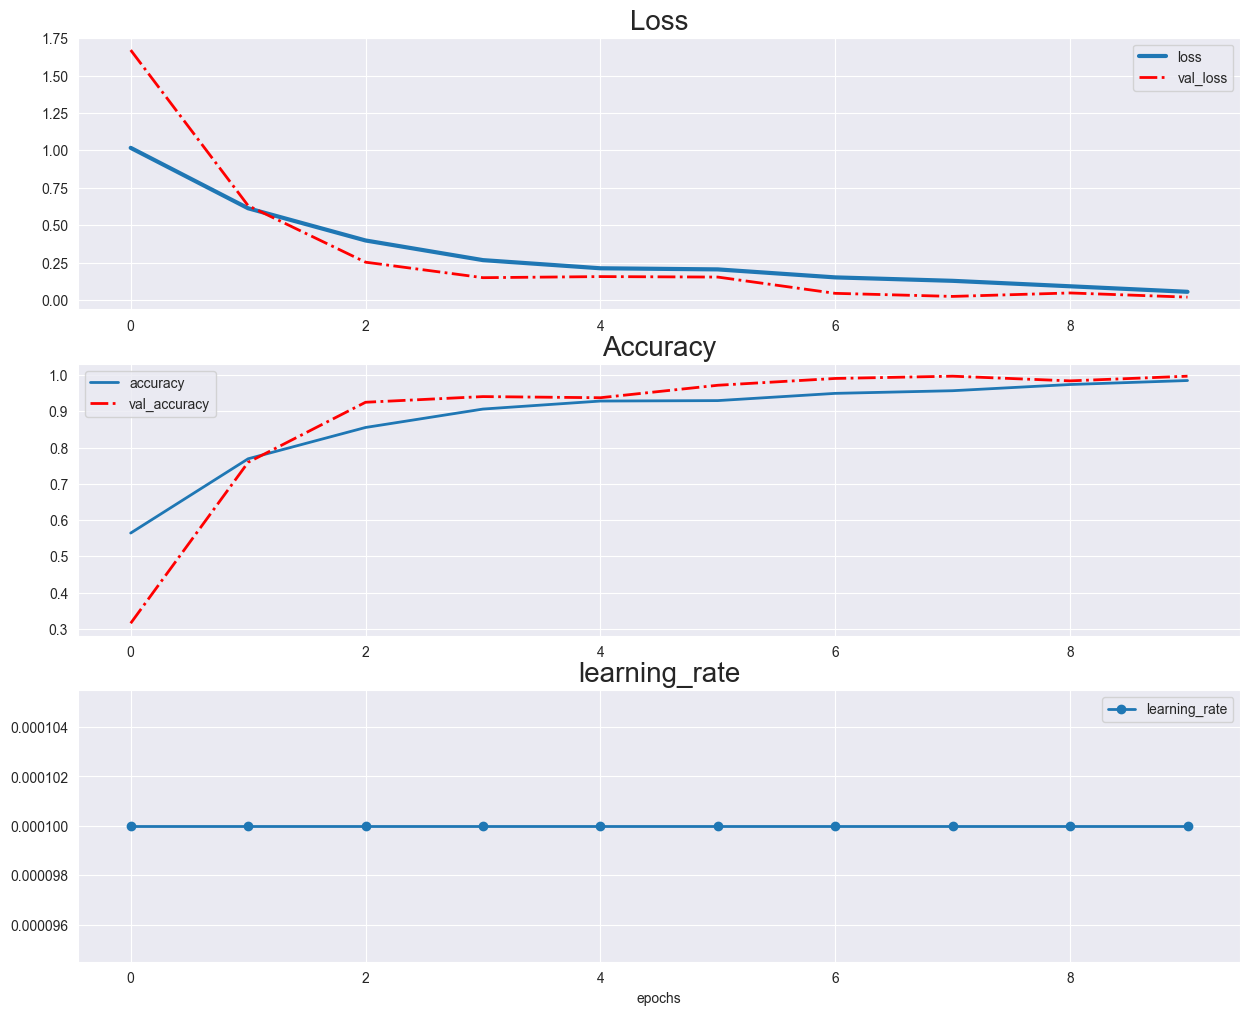

In [48]:
# Define a X variable to store range of epochs
x = np.arange(len(result_df))

# Create a plot with 3 row and 1 col with size of (15, 12)
fig, ax = plt.subplots(3, 1, figsize=(15, 12))

# AX0 : Loss
ax[0].plot(x, result_df.loss, label='loss', linewidth=3)                          
ax[0].plot(x, result_df.val_loss, label='val_loss', linewidth=2, ls='-.', c='r')
ax[0].set_title('Loss', fontsize=20)
ax[0].set_xticks(np.arange(0, len(x), 2))
ax[0].legend()

#  AX1 : Loss
ax[1].plot(x, result_df.accuracy, label='accuracy', linewidth=2)
ax[1].plot(x, result_df.val_accuracy, label='val_accuracy', linewidth=2, ls='-.', c='r')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].set_xticks(np.arange(0, len(x), 2))
ax[1].legend()

#  AX2 : Loss
ax[2].plot(x, result_df.learning_rate, label='learning_rate', linewidth=2, marker='o')
ax[2].set_title('learning_rate', fontsize=20)
ax[2].set_xlabel('epochs')
ax[2].set_xticks(np.arange(0, len(x), 2))
ax[2].legend()

plt.show()

In [49]:
# checkpoint callback, save base model weights in "MyModel.keras".
# So, we should load it by keras.models.load_model
best_model = keras.models.load_model('MyModel.keras')

In [50]:
# Evaluate model by model.evaluate()
loss, accuracy = best_model.evaluate(test_ds)
print()
print(colored(f'Loss : {loss}', 'green', attrs=['bold']))
print(colored(f'Accuracy : {accuracy*100}%', 'green', attrs=['bold']))

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 818ms/step - accuracy: 0.9914 - loss: 0.0284

Loss : 0.012377362698316574
Accuracy : 99.6874988079071%


In [51]:
# A function to load uploaded image, pre-processing and predict model
def predict_image(upload) :
    # Store a location in memory that image stored(with uploader)
    uploaded_content = list(upload.value)[0].content
    # Load image from memory to img variable by io.BytesIO and PIL.Image
    img = Image.open(io.BytesIO(uploaded_content))
    # Load image by cv2
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    # Resize image to (224, 224) whitch is ResNet50V2 input size
    img = cv2.resize(opencvImage,(224,224))
    # Reshape image array to add 3 channels
    img = img.reshape(1,224,224,3)
    # Predict model with best_model
    p = best_model.predict(img)
    # Return high probability of predictions
    p = np.argmax(p,axis=1)[0]
    
    
    if p==0:
        print('The model predicts that there is no tumor')
        
    elif p==1:
        p='Pituitary Tumor'
        
    elif p==2:
        p='Meningioma Tumor'
        
    if p==3:
        p='Glioma Tumor'
    
    if p!=0:
        print()
        print(colored(f'The Model predicts that it is a {p}', 'green'))

In [62]:
# Create Upload button by ipywidget

upload = ipywidgets.FileUpload(accept='.jpg', multiple=False)
display(upload)

FileUpload(value=(), accept='.jpg', description='Upload')

In [63]:
# Define the button and output widgets
button = ipywidgets.Button(description='Predict')
out = ipywidgets.Output()

def predict_image(upload):
    # Placeholder function - replace this with your actual prediction logic
    # Here we'll mock a prediction and just show the image and a dummy prediction result
    image = upload.data  # Get the image data from upload widget (Assuming you have something like upload.data)
    prediction_result = "Cat"  # Mock result, replace with actual prediction logic

    # Plot the image
    plt.imshow(plt.imread(image))
    plt.title(f'Prediction: {prediction_result}', fontsize=20)
    plt.axis('off')  # Hide axes
    plt.show()

# Define the callback function for the button click
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            predict_image(upload)
            
        except Exception as e:
            print(f'An error occurred: {e}')

# Bind the callback to the button
button.on_click(on_button_clicked)

# Display the button and output area
display(ipywidgets.VBox([button, out]))

In [64]:
model.save('./ModelsExport/Orlando_tumordetectie_3.keras')